# MAL O1

## September 2025


| Gruppe 30 |
| --------- |

| Navn                    | Studienummer |
| ----------------------- | ------------ |
| Lasse Borring Petersen  | 202208165    |
| Benjamin Harboe Strunge | 202209864    |
| Esben Inglev            | 202210050    |
| Asbjørn Vad             | 202208512    |


# Modules and Classes


Path setup for libs:


In [1]:
import sys,os
sys.path.append(os.path.expanduser('./libitmal'))

from libitmal import utils as itmalutils
print(dir(itmalutils))
print(itmalutils.__file__)

['AssertInRange', 'CheckFloat', 'InRange', 'Iterable', 'PrintMatrix', 'ResetRandom', 'TEST', 'TestAll', 'TestCheckFloat', 'TestPrintMatrix', 'TestVarName', 'VarName', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'ctxlib', 'inf', 'inspect', 'isFloat', 'isList', 'isNumpyArray', 'nan', 'np', 'random', 're']
/home/lassebp7/code/6.Semester/MAL/libitmal/utils.py


## Qa - Load and test libitmal


We import the library and run its test function


In [2]:
from libitmal import utils as itmalutils

itmalutils.TestAll()

TestPrintMatrix...(no regression testing)
X=[[   1.    2.]
   [   3. -100.]
   [   1.   -1.]]
X=[[ 1.  2.]
   ...
   [ 1. -1.]]
X=[[   1.
       2.    ]
   [   3.0001
    -100.    ]
   [   1.
      -1.    ]]
X=[[   1.    2.]
   [   3. -100.]
   [   1.   -1.]]
OK
TEST: OK
ALL OK


## Qb Create your own module, with some functions, and test it


Below is two small printer functions placed in `malutils` and imported:


In [3]:
import malutils

malutils.HelloWorld()
malutils.Greeter("Pokemon!")

Hello World!
Hello Pokemon!!


## Qc How do you 'recompile' a module?

### Answer

Reload of modules can be done in serveral ways. One simple way is to just restart the kernal.
Another is the code below.


In [4]:
import importlib
importlib.reload(malutils)


<module 'malutils' from '/home/lassebp7/code/6.Semester/MAL/mal_grp30/O1/malutils/__init__.py'>

If you are using VSCode, it is also possible to add the following code to settings.json, which will make the notebook auto reload the module changes.

```
  "jupyter.runStartupCommands": ["%load_ext autoreload", "%autoreload 2"],
```


## Qe Extend the class with some public and private functions and member variables

### Answers

As can be seen below, private function and member variables are represented in python by two \_\_ prefixed to the name.

The meaning of `self` is that it is a reference to the class instance itself. Other languages have 'this' as a reference to the class instance itself.

Calling a function without `self` in the parameter list is not allowed in python, as can be seen from the output of the exception catch.


In [5]:
class MyClass:
    def myFun(self):
        self.myvar = "Public function"
        print(f"This is a message inside the class, myvar={self.myvar}.")

    #private function
    def __myfun(self):
        self.myvar = "Private"
        print(f"This is a private message inside the class, myvar={self.myvar}.")

    def callToPrivate(self):
        print(f"Calling private function, myvar={self.myvar}.")
        self.__myfun()
        print("Done with private function")

    def myFun2(): # this wont work!
        print("No self")


instance = MyClass()

instance.myFun()
try:
    instance.__myfun()
except:
    print("Exception: can't call private function")

instance.callToPrivate()
try:
    instance.myFun2()
except:
    print("Exception: no self class method!")

This is a message inside the class, myvar=Public function.
Exception: can't call private function
Calling private function, myvar=Public function.
This is a private message inside the class, myvar=Private.
Done with private function
Exception: no self class method!


## Qf Extend the class with a Constructor


### Answers

As can be seen below, the constructor is named \_\_init\_\_ and takes the 'self' parameter and an arbitrary number of parameters.
There is no real destructor compared to the C++ destructor. Python is a managed language, so objects that are no longer in use are garbage collected.

The \_\_del\_\_ function is not a destructor. It's just a function that gets called when the garbage collector destroys the instance.


In [6]:
class MyCtorClass:
    def __init__(self,x):
        self.x = x
        print(f"Constructor called with x={x}")

    def GetX(self):
        return self.x

ctorInstance = MyCtorClass(42)
num = ctorInstance.GetX()
print(f"numn from instance = {num}")


Constructor called with x=42
numn from instance = 42


## Qg Extend the class with a to-string function

Below is a small class with a "to string" method:


In [7]:
class MyToStringClass:
    def __init__(self,x):
        self.x = x

    def __str__(self):
        return f"MyToStringClass (x={self.x})"

strClass = MyToStringClass(420)
print(strClass)

MyToStringClass (x=420)


# Intro


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
import os

def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

datapath = os.path.join("./datasets", "lifesat", "")

# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
#country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
#plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()
# Train the model
model.fit(X, y)

print("OK")


OK


## Qa) The $\theta$ parameters and the $R^2$ Score


### Answers

Maximum for $R^2$ is 1.

Minimum for $R^2$ is negative infinity. This is if the model makes predictions worse than just guessing the average, and can be a result of overfitting, bad test data etc.

It's better to have a higher R^2 score. This measures the fitness of the model.


In [9]:
# skæring ved x-aksen
theta_0 = model.intercept_
# koefficienten
theta_1 = model.coef_[0]
print(f"h(x) = {theta_0[0]:.4f} + {theta_1[0]}x")

u = np.sum((y - model.predict(X))**2)
v = np.sum((y - np.mean(y))**2)

R2 = 1 - u/v
R2_skl = model.score(X, y)
print(f"R2 = {R2}")
print(f"R2_skl = {R2_skl}")

h(x) = 4.8531 + 4.911544589158484e-05x
R2 = 0.7344414355437031
R2_skl = 0.7344414355437031


## Qb) Using k-Nearest Neighbors


### Answers

KNN regressor also uses R^2 as a score, so in that regard they can be compared to each other. However, the knn model might overfit to the data, since k=3 allows for the model to fluctuate a bit.

This information about the score function was found at the following locations in the documentation.

Linear Reg
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

KNN
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor.score


X.shape= (29, 1)
y.shape= (29, 1)


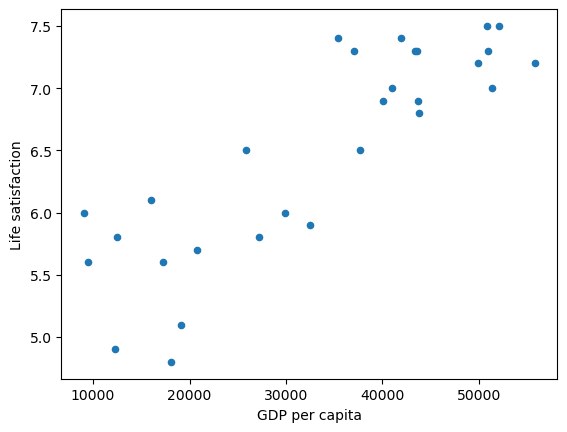

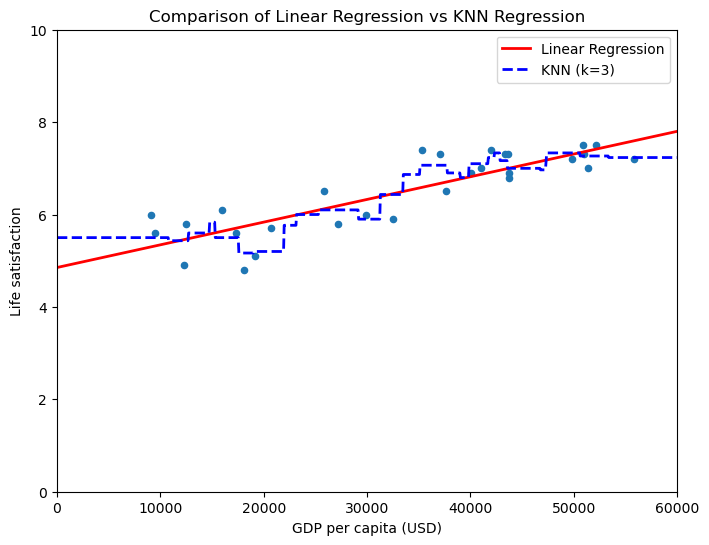

Linear Regression Score (R²): 0.734
KNN Score (R²): 0.853

Predictions for Cyprus (GDP = 22587 USD):
Linear Regression: 5.96
KNN (k=3): [5.76666667]
KNN score              : 0.8525732853499179
Linear Regression score: 0.7344414355437031


In [10]:
# Prepare the data
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

print("X.shape=",X.shape)
print("y.shape=",y.shape)

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select and train a model
k = 3
knn = sklearn.neighbors.KNeighborsRegressor(k)
knn.fit(X, y)

# Plot knn
m = np.linspace(0, 60000, 1000)
M = np.empty([m.shape[0], 1])
M[:, 0] = m

y_pred_lin = model.predict(M)  # Linear regression predictions
y_pred_knn = knn.predict(M)

# Create the plot
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8, 6))
plt.axis([0, 60000, 0, 10])

# Plot both model predictions
plt.plot(m, y_pred_lin, "r-", label="Linear Regression", linewidth=2)
plt.plot(m, y_pred_knn, "b--", label=f"KNN (k={k})", linewidth=2)

# Add labels and legend
plt.xlabel("GDP per capita (USD)")
plt.ylabel("Life satisfaction")
plt.legend()
plt.title("Comparison of Linear Regression vs KNN Regression")
plt.show()

# Print model performance
print(f"Linear Regression Score (R²): {model.score(X, y):.3f}")
print(f"KNN Score (R²): {knn.score(X, y):.3f}")

# Make prediction for Cyprus
X_cyprus = [[22587]]
lin_pred = model.predict(X_cyprus)
knn_pred = knn.predict(X_cyprus)

print(f"\nPredictions for Cyprus (GDP = 22587 USD):")
print(f"Linear Regression: {lin_pred[0][0]:.2f}")
print(f"KNN (k={k}): {knn_pred[0]}")

knn_score = knn.score(X, y)
print(f"KNN score              : {knn_score}")
print(f"Linear Regression score: {R2_skl}")


## Qc) Tuning Parameter for k-Nearest Neighbors and A Sanity Check


### Answers

#### K=1 gives score 1

This obviously looks good because of what is discussed earlier about higher R2 values, but by looking at the graph, it just fits the model 100%, because it just draws a line between each point. This means it has no idea how to predict anything depending on the training data, and it will just predict the training data value closest to whatever value we are trying to predict using the model.

#### k=5, k=10...

The model uses more neighbors to predict new data, where the higher k means it looks at more neighbors to make its prediction. This will make the generalization better, but lower the training score and the R2 value.

#### k20...

When setting the neighbor count this high in with this data, we get severe underfitting, where the line just becomes straight, since it factors in all data points every time.


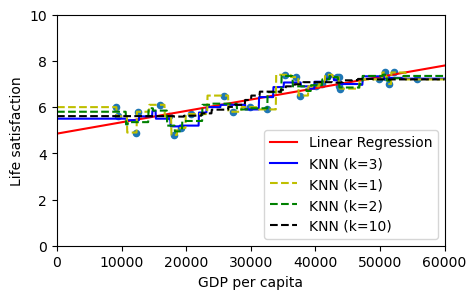

KNN score (k=1)   : 1.0
KNN score (k=2)   : 0.9091881835016248
KNN score (k=3)   : 0.8525732853499179
KNN score (k=10)  : 0.7833080605150065
Linear Regression score: 0.7344414355437031


In [11]:
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])

# create an test matrix M, with the same dimensionality as X, and in the range [0;60000]
# and a step size of your choice
m=np.linspace(0, 60000, 1000)
M=np.empty([m.shape[0],1])
M[:,0]=m

# from this test M data, predict the y values via the lin.reg. and k-nearest models
y_pred_lin = model.predict(M)
y_pred_knn = knn.predict(M)   # ASSUMING the variable name 'knn' of your KNeighborsRegressor

# use plt.plot to plot x-y into the sample_data plot..
plt.plot(m, y_pred_lin, "r", label="Linear Regression")
plt.plot(m, y_pred_knn, "b", label="KNN (k=3)")
knn_score3 = knn.score(X, y)

knn = sklearn.neighbors.KNeighborsRegressor(1)
knn.fit(X, y)
knn_score1 = knn.score(X, y)
y_pred_knn1 = knn.predict(M)
plt.plot(m, y_pred_knn1, "y--", label="KNN (k=1)")

knn = sklearn.neighbors.KNeighborsRegressor(2)
knn.fit(X, y)
knn_score2 = knn.score(X, y)
y_pred_knn2 = knn.predict(M)
plt.plot(m, y_pred_knn2, "g--", label="KNN (k=2)")

knn = sklearn.neighbors.KNeighborsRegressor(10)
knn.fit(X, y)
knn_score10 = knn.score(X, y)
y_pred_knn10 = knn.predict(M)
plt.plot(m, y_pred_knn10, "k--", label="KNN (k=10)")

plt.legend()
plt.show()

#scores
print(f"KNN score (k=1)   : {knn_score1}")
print(f"KNN score (k=2)   : {knn_score2}")
print(f"KNN score (k=3)   : {knn_score3}")
print(f"KNN score (k=10)  : {knn_score10}")
print(f"Linear Regression score: {R2_skl}")

## Qd) Trying out a Neural Network


Iteration 1, loss = 61060538.53562827
Iteration 2, loss = 59751929.70751245
Iteration 3, loss = 58459496.36499680
Iteration 4, loss = 57183456.04297394
Iteration 5, loss = 55924014.05871172
Iteration 6, loss = 54681362.85123138
Iteration 7, loss = 53455681.38170152
Iteration 8, loss = 52247134.59925080
Iteration 9, loss = 51055872.97581661
Iteration 10, loss = 49882032.11282311
Iteration 11, loss = 48725732.42162992
Iteration 12, loss = 47587078.87883642
Iteration 13, loss = 46466160.85667907
Iteration 14, loss = 45363052.02793609
Iteration 15, loss = 44277810.34397355
Iteration 16, loss = 43210478.08383708
Iteration 17, loss = 42161081.97162931
Iteration 18, loss = 41129633.35882106
Iteration 19, loss = 40116128.46763241
Iteration 20, loss = 39120548.69119026
Iteration 21, loss = 38142860.94582679
Iteration 22, loss = 37183018.07062516
Iteration 23, loss = 36240959.26914561
Iteration 24, loss = 35316610.58817180
Iteration 25, loss = 34409885.42829854
Iteration 26, loss = 33520685.0812

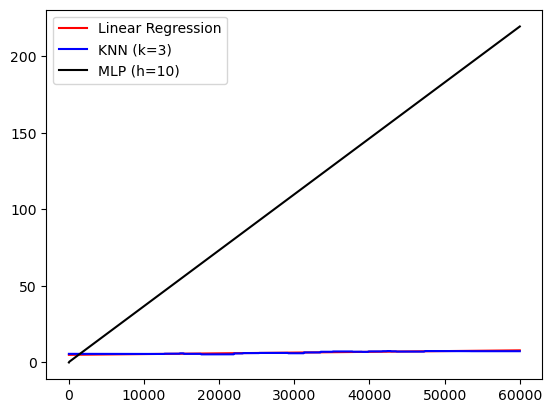

Predictions for Cyprus (GDP = 22587 USD): 82.76600900507204
KNN score (k=3)   : 0.8525732853499179
Linear Regression score: 0.7344414355437031
MLP score         : -23666.941812336438


In [12]:
from sklearn.neural_network import MLPRegressor

# Setup MLPRegressor
mlp = MLPRegressor( hidden_layer_sizes=(10,), solver='adam', activation='relu', tol=1E-5, max_iter=100000, verbose=True)
mlp.fit(X, y.ravel())

# lets make a MLP regressor prediction and redo the plots
y_pred_mlp = mlp.predict(M)

mlp_score = mlp.score(X, y)

plt.plot(m, y_pred_lin, "r", label="Linear Regression")
plt.plot(m, y_pred_knn, "b", label="KNN (k=3)")
plt.plot(m, y_pred_mlp, "k", label="MLP (h=10)")

plt.legend()
plt.show()

y_nn_pred = mlp.predict(X_cyprus)
print(f"Predictions for Cyprus (GDP = 22587 USD): {y_nn_pred[0]}")

# Scores
print(f"KNN score (k=3)   : {knn_score3}")
print(f"Linear Regression score: {R2_skl}")
print(f"MLP score         : {mlp_score}")


### Qd Answers

**Can the score for MLP be compared with LinReg and KNN?**

Yes, in the docs for the MLP's score function, it is calculated the same way as they are in both other fits, so they can be compared.
For the MLP, we get a pretty bad fit, as we can see in both the negative R2 score, and by looking at the plot.

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor.score


# Cost Function


## Qa Given the following $\mathbf{x}^{(i)}$'s, construct and print the $\mathbf X$ matrix in python.


Definitions of $x^{(i)}$'s is stripped from this pdf - can be found in original exercise notebook.


In [13]:
import numpy as np

y_true = np.array([1,2,3,4]) # NOTE: you'll need this later
X = np.array([[1,2,3],[4,2,1],[3,8,5],[-9,-1,0]])

print("X_true = \n", X)

X_true = 
 [[ 1  2  3]
 [ 4  2  1]
 [ 3  8  5]
 [-9 -1  0]]


## Qb Implement the L1 and L2 norms for vectors in python.


Defined without using any methods from libraries, og python primitives.


In [14]:
import math

def L1(x): 
    if x.ndim != 1:
        raise ValueError("expected x to be of ndim=1, got ndim=",X.ndim)    
    sum = 0
    for i in x: 
        if i > 0:
            sum += i
        else:
            sum += -i
    return sum 


def L2(x):
    if x.ndim != 1:
        raise ValueError("expected x to be of ndim=1, got ndim=",X.ndim)    
    sum = 0
    for i in x:     
        sum += i**2
    sum = sum**0.5
    return sum

def L2Dot(x):
    assert x.ndim == 1 and isinstance(x, np.ndarray)
    return x.dot(x)**0.5

# TEST vectors: here I test your implementation...calling your L1() and L2() functions
tx=np.array([1, 2, 3, -1])
ty=np.array([3,-1, 4,  1])

expected_d1=8.0
expected_d2=4.242640687119285

d1=L1(tx-ty)
d2=L2(tx-ty)

print(f"tx-ty={tx-ty}, d1-expected_d1={d1-expected_d1}, d2-expected_d2={d2-expected_d2}")

eps=1E-9
assert math.fabs(d1-expected_d1)<eps, "L1 dist seems to be wrong"
assert math.fabs(d2-expected_d2)<eps, "L2 dist seems to be wrong"

print("OK(part-1)")

d2dot=L2Dot(tx-ty)
print("d2dot-expected_d2=",d2dot-expected_d2)
assert math.fabs(d2dot-expected_d2)<eps, "L2Ddot dist seem to be wrong"
print("OK(part-2)")

tx-ty=[-2  3 -1 -2], d1-expected_d1=0.0, d2-expected_d2=0.0
OK(part-1)
d2dot-expected_d2= 0.0
OK(part-2)


## Qc Construct the Root Mean Square Error (RMSE) function (Equation 2-1 [HOML]).


In [15]:
def RMSE(y_pred, y_true):
    assert len(y_pred) == len(y_true) and y_pred.ndim == 1 and y_true.ndim == 1
    err_vec = y_pred - y_true
    l2 = L2(err_vec)
    return l2 / len(err_vec)**0.5

# Dummy h function:
def h(X):
    if X.ndim!=2:
        raise ValueError("excpeted X to be of ndim=2, got ndim=",X.ndim)
    if X.shape[0]==0 or X.shape[1]==0:
        raise ValueError("X got zero data along the 0/1 axis, cannot continue")
    return X[:,0]

# Calls your RMSE() function:
r=RMSE(h(X), y_true)

eps=1E-9
expected=6.57647321898295
print(f"RMSE={r}, diff={r-expected}")
assert math.fabs(r-expected)<eps, "your RMSE dist seems to be wrong"

print("OK")

RMSE=6.576473218982953, diff=2.6645352591003757e-15
OK


## Qd Similar construct the Mean Absolute Error (MAE) function (Equation 2-2 [HOML]) and evaluate it.


In [16]:
def MAE(y_pred, y_true):
    assert len(y_pred) == len(y_true) and y_pred.ndim == 1 and y_true.ndim == 1
    err_vec = y_pred - y_true
    return L1(err_vec) / len(err_vec)


# Calls your MAE function:
r=MAE(h(X), y_true)

# TEST vector:
expected=3.75
print(f"MAE={r}, diff={r-expected}")
assert math.fabs(r-expected)<eps, "MAE dist seems to be wrong"

print("OK")

MAE=3.75, diff=0.0
OK


## Qe Robust Code

The functions above in this journal section are already made robust with asserts.


## Qf Conclusion

### Answer

Cost functions are at the basis of what the algorithms view as a success or not. A cost function is essentially, what the measure the machine should look for when training, or try to minimize. What lies behind the cost function is therefore essential. The L1 and L2 calculations are some of the key ingredients in the basic cost functions, and understanding how they work, and what they represent is key.

When L1 is used, the absolute errors are simply summed up. But the L2 squares all of the errors, which means it is more sensitive to outlier data, and is more punishing at larger errors.


# Dummy Classifier


## Qa Load and display the MNIST data

We create the `MNIST_GetDataSet()` and `MNIST_PlotDigit()` functions, so they can be reused later.


In [17]:
import matplotlib.pyplot as plt
import matplotlib
from sklearn.datasets import fetch_openml

def MNIIST_GetDataSet():
    X, y = fetch_openml('mnist_784', return_X_y=True, cache=True, as_frame=False)
    return X, y

X, y = MNIIST_GetDataSet()
print(f"Shape of X: {X.shape}")

Shape of X: (70000, 784)


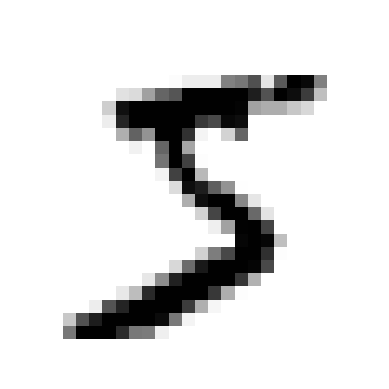

In [18]:
def MNIST_PlotDigit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary)
    plt.axis("off")

MNIST_PlotDigit(X[0])
plt.show()

## Qb Add a Stochastic Gradient Decent [SGD] Classifier


Below the data is split into train and test sets, and the SGD classifier is trained.


In [19]:
from sklearn.linear_model import SGDClassifier

X_train, X_test, y_train, y_test = X[:50000], X[50000:], y[:50000], y[50000:]

y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

sgd_predict_5 = sgd_clf.predict(X_test)

In order to print some correctly classified and incorrectly classified digits, we first get some of the indecies of these digits:


In [20]:
true_positives = []
false_positives = []
false_negatives = []
for i in range(len(y_test_5)):
    if y_test_5[i] == True and sgd_predict_5[i] == True:
        true_positives.append(i)
    elif y_test_5[i] == False and sgd_predict_5[i] == True:
        false_positives.append(i)
    elif y_test_5[i] == True and sgd_predict_5[i] == False:
        false_negatives.append(i)
print(f"Number of true positives : {len(true_positives)}")
print(f"Number of false positives: {len(false_positives)}")
print(f"Number of false negatives: {len(false_negatives)}")

Number of true positives : 1523
Number of false positives: 615
Number of false negatives: 284


Now we plot some digits:

First, the true positives:


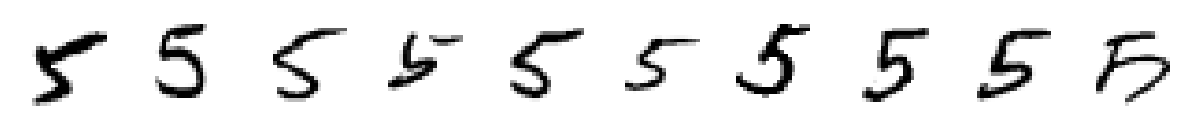

In [21]:
# Plotting some true positives:
def PlotMultiple(amount, indicies, X):
    fig, axes = plt.subplots(1, amount, figsize=(12, 4))
    for i in range(amount):
        plt.subplot(1, amount, i + 1)
        MNIST_PlotDigit(X[indicies[i]])

    plt.tight_layout()
    plt.show()

PlotMultiple(10, true_positives, X_test)

Then some false positives:


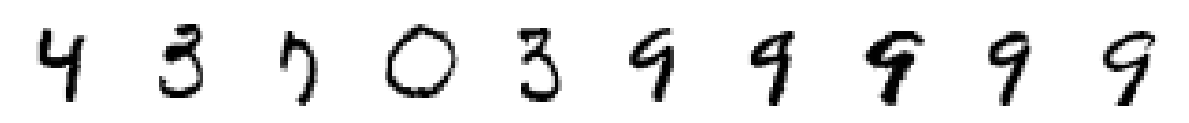

In [22]:
# Plotting some false positives
PlotMultiple(10, false_positives, X_test)

And some false negatives:


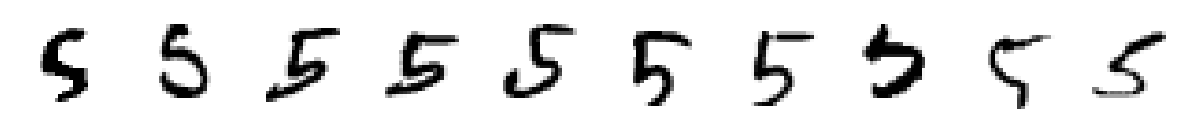

In [23]:
# Plotting some false negatives
PlotMultiple(10, false_negatives, X_test)

## Qc Implement a dummy binary classifier


Below is a (very stupid) DummyClassifier, that simply takes in a 'strategy' and classifies everything as that strategy:


In [24]:
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np

class DummyClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, strategy):
        self.strategy = strategy

    def fit(self, X, y=None):
        # Actually do nothing
        return self

    def predict(self, X):
        n_samples = X.shape[0]
        return np.full(n_samples, self.strategy)

    def score(self, X, y):
        y_pred = self.predict(X)
        return accuracy_score(y, y_pred)

Testing the classifier and printing the score:


In [25]:
dummy = DummyClassifier(False)
dummy.fit(X_train, y_train_5)

dummy_pred = dummy.predict(X_test)
dummy_score = dummy.score(X_test, y_test_5)
print(f"dummy_score: {dummy_score}")

dummy_score: 0.90965


### Comparison with book result

Our score is 0.909, which fits perfectly with the books result of 0.909 as well. They are of course compatible as both classifiers are just guessing false on all images. This should theoretically give us an accuraccy of 90%, which fits

(10 numbers, 1 of those is 5..., 90%)


## Qd Conclusion


### Answer

In general, this exercise was mostly about getting the basic machine learning and sklearn techniques into our fingers.
Splitting the MNIST test set for common ML best practices, and creating a very basic binary classifier adds greatly to the understanding of how ML works - and also that it is not magic. Even a fairly simple human catagorization of "5 or not 5" turns out to be not so easy, as can be seen on the plots of the false positives and false negatives. This was quite revealing, as some of the 5's looks like they should be easily recognizable.

Also, this exercise gave some insight into how python classes work together with the sklearn library, when creating our own classifier. Something that might be useful when a very specific type of classification is needed, or later in the course.

Lastly, we can also conclude that it is important to think about what kind of data and classification that you are working with. Just because you have an accuracy of 90%, does not necessarily make the model good, as we see when using the dummy classifier.


# Performance Metrics


## Qa Implement the Accuracy function and test it on the MNIST data.

We added the assert at the top of `UnpackPerfMetrics()`, to make sure the denom is above 0.


In [26]:
import math

def UnpackPerfMetrics(y_true, y_pred):
    assert y_true.shape == y_pred.shape and y_true.shape[0] > 0
    TP, TN, FP, FN = 0, 0, 0, 0
    for i, _ in enumerate(y_pred):
        if y_true[i] == True and y_pred[i] == True:
            TP += 1
        elif y_true[i] == False and y_pred[i] == False:
            TN += 1
        elif y_true[i] == True and y_pred[i] == False:
            FN += 1
        else:
            FP += 1
    return TP, TN, FP, FN

def MyAccuracy(y_true, y_pred):
    TP, TN, FP, FN = UnpackPerfMetrics(y_true, y_pred)
    accuracy = (TP + TN) / y_true.shape[0]
    return accuracy

from sklearn.metrics import accuracy_score

def TestAccuracy(y_true, y_pred):
    a0=MyAccuracy(y_true, y_pred)
    a1=accuracy_score(y_true, y_pred)

    print(f"MyAccuracy     = {a0}")
    print(f"accuracy_score = {a1}")

    eps = 1E-9
    if math.fabs(a0 - a1) > eps:
        raise ValueError("Difference in MyAccuracy and accuracy_score too big!")

TestAccuracy(y_test_5, sgd_predict_5)
TestAccuracy(y_test_5, dummy_pred)


MyAccuracy     = 0.95505
accuracy_score = 0.95505
MyAccuracy     = 0.90965
accuracy_score = 0.90965


## Qb Implement Precision, Recall and $F_1$-score and test it on the MNIST data for both the SGD and Dummy classifier models


Check for denom = 0 is in `UnpackPerfMetrics()`, as shown in Qa.


In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score
def MyPrecision(y_true, y_pred):
    TP, TN, FP, FN = UnpackPerfMetrics(y_true, y_pred)
    if TP + FP == 0: return 0.0
    return TP / (TP + FP)

def MyRecall(y_true, y_pred):
    TP, TN, FP, FN = UnpackPerfMetrics(y_true, y_pred)
    if TP + FN == 0: return 0.0
    return TP / (TP + FN)

def MyF1Score(y_true, y_pred):
    precision = MyPrecision(y_true, y_pred)
    recall = MyRecall(y_true, y_pred)
    if precision == 0 or recall == 0: return 0.0
    return 2 / (1/precision + 1/recall)

def TestMetrics(y_true, y_pred):
    p0 = MyPrecision(y_true, y_pred)
    p1 = precision_score(y_true, y_pred)

    r0 = MyRecall(y_true, y_pred)
    r1 = recall_score(y_true, y_pred)

    f1_0 = MyF1Score(y_true, y_pred)
    f1_1 = f1_score(y_true, y_pred)

    eps = 1E-9

    print(f"MyPrecision     = {p0}")
    print(f"precision_score = {p1}")
    if math.fabs(p0 - p1) > eps:
        raise ValueError("Difference in MyPrecision and precision_score too big!")

    print(f"MyRecall        = {r0}")
    print(f"recall_score    = {r1}")
    if math.fabs(r0 - r1) > eps:
        raise ValueError("Difference in MyRecall and recall_score too big!")

    print(f"MyF1Score       = {f1_0}")
    print(f"f1_score        = {f1_1}")
    if math.fabs(f1_0 - f1_1) > eps:
        raise ValueError("Difference in MyF1Score and f1_score too big!")

print("SGD Performance Metrics")
TestMetrics(y_test_5, sgd_predict_5)
print("=============")
print("Dummy Performance Metrics")
TestMetrics(y_test_5, dummy_pred)


SGD Performance Metrics
MyPrecision     = 0.7123479887745556
precision_score = 0.7123479887745556
MyRecall        = 0.8428334255672385
recall_score    = 0.8428334255672385
MyF1Score       = 0.7721166032953104
f1_score        = 0.7721166032953105
Dummy Performance Metrics
MyPrecision     = 0.0
precision_score = 0.0
MyRecall        = 0.0
recall_score    = 0.0
MyF1Score       = 0.0
f1_score        = 0.0


/home/lassebp7/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Qc The Confusion Matrix


In [28]:
from sklearn.metrics import confusion_matrix

M_dummy = confusion_matrix(y_test_5, dummy_pred)
M_SGD = confusion_matrix(y_test_5, sgd_predict_5)

print("M_dummy:\n", M_dummy)
print("M_SGD:\n", M_SGD)

M_dummy_swapped = confusion_matrix(dummy_pred, y_test_5)
M_SGD_swapped = confusion_matrix(sgd_predict_5, y_test_5)

print("M_dummy_swapped:\n", M_dummy_swapped)
print("M_SGD_swapped:\n", M_SGD_swapped)

M_dummy:
 [[18193     0]
 [ 1807     0]]
M_SGD:
 [[17578   615]
 [  284  1523]]
M_dummy_swapped:
 [[18193  1807]
 [    0     0]]
M_SGD_swapped:
 [[17578   284]
 [  615  1523]]


### Qc Answer

From the result of running the code, the matrix returned from confusion matrix must be

[[TN, FP]

[FN, TP]]

As the dummy model never predicts true, no positives are to be found, and the second column will be all 0's

In the SDG we see that it predicts some positives, so the second column has numbers. It is mostly correct, but there are still some false positives and negatives

#### Swapped variable order

Swapping the variable order swaps the places of FP and FN, and can therefore lead to some quite different conclusions.


## Qd A Confusion Matrix Heat-map


We created heat maps for the 2x2 confusion matrixes, seen below


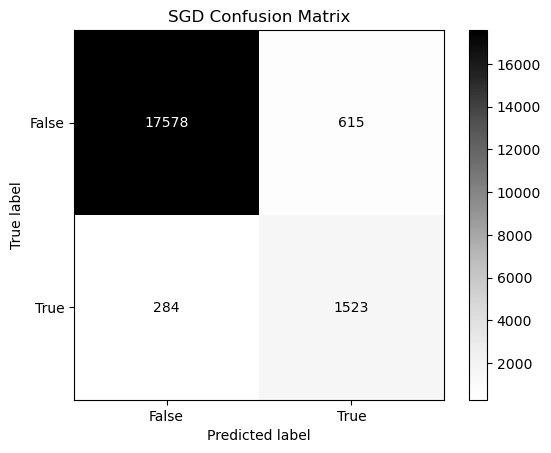

<Figure size 640x480 with 0 Axes>

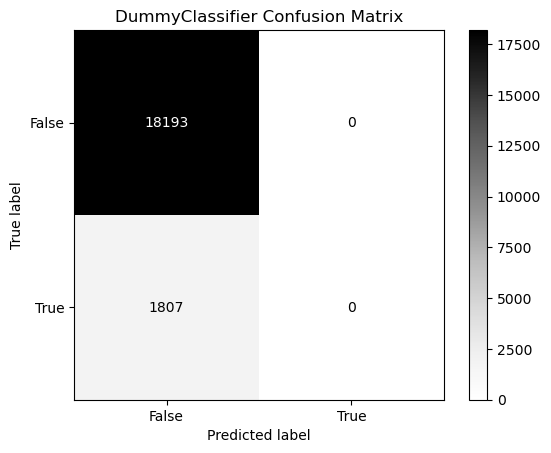

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(y_test_5, sgd_predict_5, cmap="Grays")
plt.title("SGD Confusion Matrix")
plt.figure()
ConfusionMatrixDisplay.from_predictions(y_test_5, dummy_pred, cmap="Grays")
plt.title("DummyClassifier Confusion Matrix")
plt.show()

## Qe Conclusion


In this exercise notebook we have looked at different types of metrics, that we can use to evaluate our models. We went through some of the functions that are used for this, such as recall, F1 and precision, and implemented them by hand, to better our understanding of how they work behind the scenes.

After that we looked at confusion matrices, that we can use to look at the numbers directly, to see how many TP, FP, TN and TP we are getting from our dataset through our model. We also compared our SGD model to the dummy model, to directly see how the dummy model works. We could see from the numbers produced here that due to how our dataset is structured and how our classification is made, why the dummy model achieved a high accuracy in the previous exercise.

Lastly, we looked at ways to visualize these heatmaps in different versions, to analyze where our model makes the most mistakes. This information can then be used to see where it needs to be improved to achieve better results.
